In [1]:
%matplotlib inline


# Permutation Importance with Multicollinear or Correlated Features



In [2]:
print(__doc__)
from collections import defaultdict

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import spearmanr
from scipy.cluster import hierarchy

from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

Automatically created module for IPython interactive environment


Random Forest Feature Importance on Divorce Data
------------------------------------------------------
First, we train a random forest on the dataset and evaluate
its accuracy on a test set:



In [3]:
data = pd.read_csv('divorce-csv.csv')
feature_names = data.columns
feature_names = feature_names.drop('Class')
feature_names = feature_names.drop(feature_names[40:]) 

X = data.drop('Class', axis=1)
X = X.drop(X.iloc[:, 40:], axis = 1) 

y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

clf = RandomForestClassifier(n_estimators=250, random_state=42)
clf.fit(X_train, y_train)
print("Accuracy on test data: {:.2f}".format(clf.score(X_test, y_test)))
# print(feature_names)

Accuracy on test data: 0.98


Next, we plot the tree based feature importance and the permutation
importance. The permutation importance plot shows that permuting a feature
drops the accuracy by at most `0.012`, which would suggest that none of the
features are important. This is in contradiction with the high test accuracy
computed above: some feature must be important. The permutation importance
is calculated on the training set to show how much the model relies on each
feature during training.



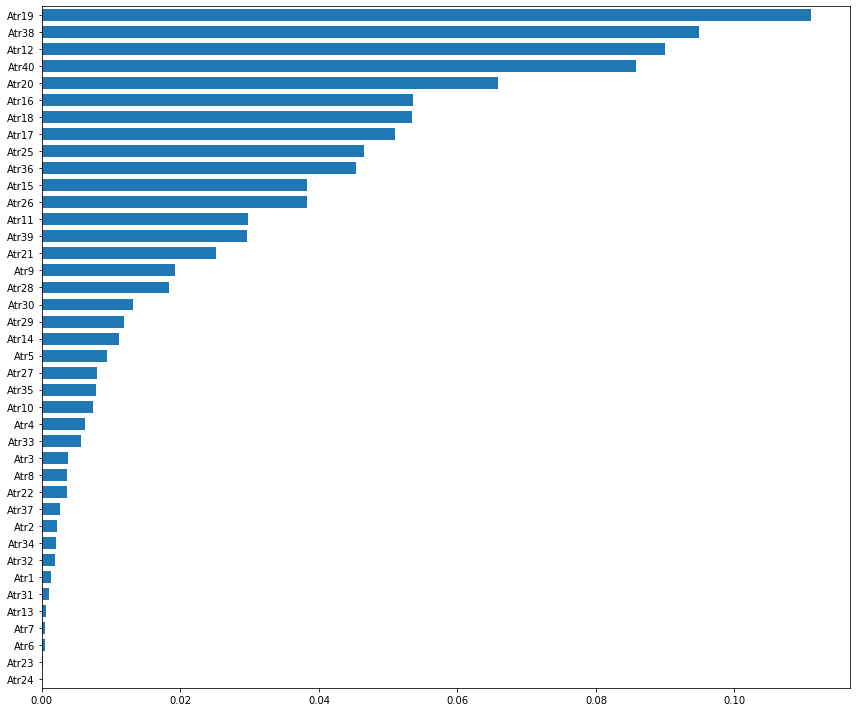

In [4]:
result = permutation_importance(clf, X_train, y_train, n_repeats=10, random_state=42)
perm_sorted_idx = result.importances_mean.argsort()

tree_importance_sorted_idx = np.argsort(clf.feature_importances_)
tree_indices = np.arange(0, len(clf.feature_importances_)) + 0.5

fig, (ax1) = plt.subplots(1, 1, figsize=(12, 10))
ax1.barh(tree_indices,
         clf.feature_importances_[tree_importance_sorted_idx], height=0.7)
ax1.set_yticklabels(feature_names[tree_importance_sorted_idx])
ax1.set_yticks(tree_indices)
ax1.set_ylim((0, len(clf.feature_importances_)))
fig.tight_layout()
plt.show()

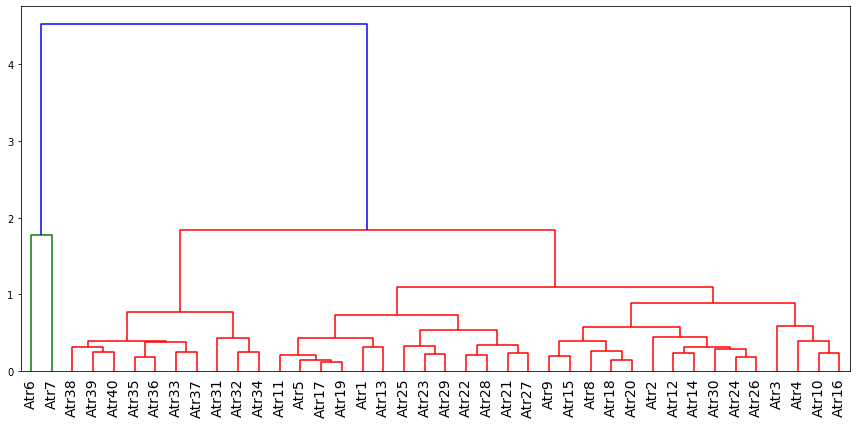

In [5]:
fig, ax1  = plt.subplots(1, 1, figsize=(12, 6))
corr = spearmanr(X).correlation
corr_linkage = hierarchy.ward(corr)
dendro = hierarchy.dendrogram(corr_linkage, labels=feature_names, ax=ax1, leaf_font_size = 14,
                              leaf_rotation=90)
dendro_idx = np.arange(0, len(dendro['ivl']))
fig.tight_layout()
plt.show()

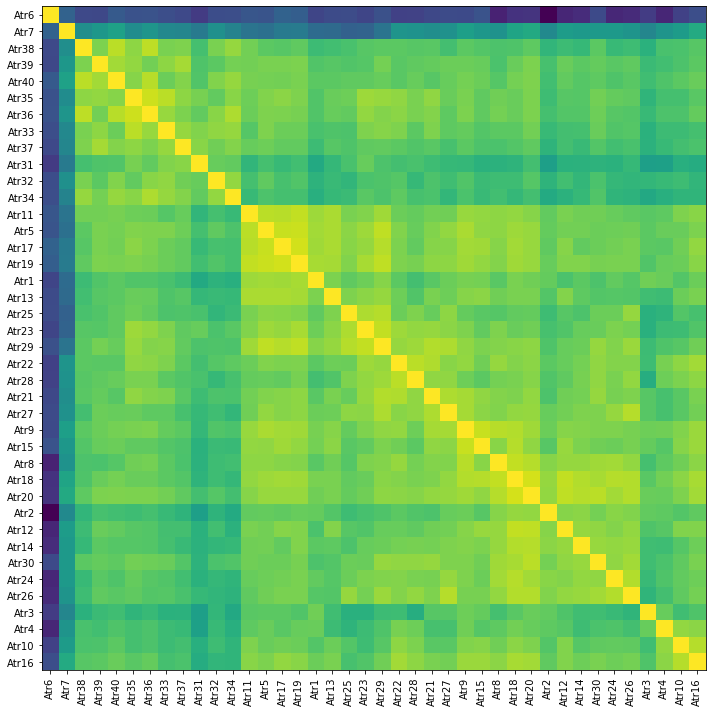

In [6]:
fig, ax2 = plt.subplots(1, 1, figsize=(10, 10))
corr = spearmanr(X).correlation
corr_linkage = hierarchy.ward(corr)
dendro = hierarchy.dendrogram(corr_linkage, labels=feature_names, ax=ax1, leaf_font_size = 14,
                              leaf_rotation=90)
dendro_idx = np.arange(0, len(dendro['ivl']))

ax2.imshow(corr[dendro['leaves'], :][:, dendro['leaves']])
ax2.set_xticks(dendro_idx)
ax2.set_yticks(dendro_idx)
ax2.set_xticklabels(dendro['ivl'], rotation='vertical')
ax2.set_yticklabels(dendro['ivl'])
fig.tight_layout()
plt.show()